In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [52]:
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [53]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [54]:
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [55]:
insurance_dataset.shape

(1338, 7)

In [56]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [57]:
insurance_dataset.isnull().sum()

,0
age,0
sex,0
bmi,0
children,0
smoker,0
region,0
charges,0


In [58]:
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


<ipython-input-59-da509861dbf2>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['age'])


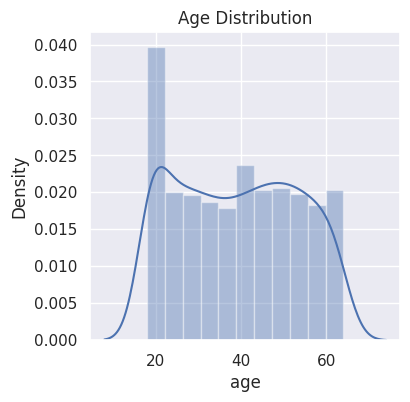

In [59]:
#Distribution of age value

sns.set()
plt.figure(figsize=(4,4))
plt.title("Age Distribution")
sns.distplot(insurance_dataset['age'])
plt.show()

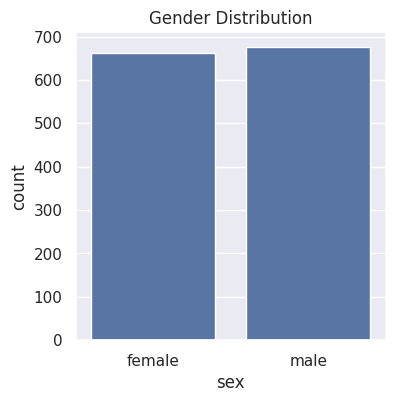

In [60]:
#Gender Column

plt.figure(figsize=(4,4))
plt.title("Gender Distribution")
sns.countplot(x = 'sex', data = insurance_dataset )
plt.show()

In [61]:
insurance_dataset['sex'].value_counts()

,count
sex,
male,676
female,662


<ipython-input-62-81a92186b5ff>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['bmi'])


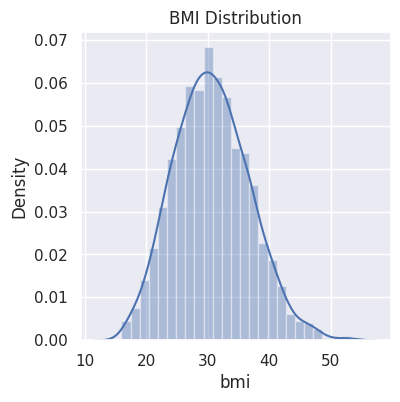

In [62]:
plt.figure(figsize=(4,4))
plt.title("BMI Distribution")
sns.distplot(insurance_dataset['bmi'])
plt.show()

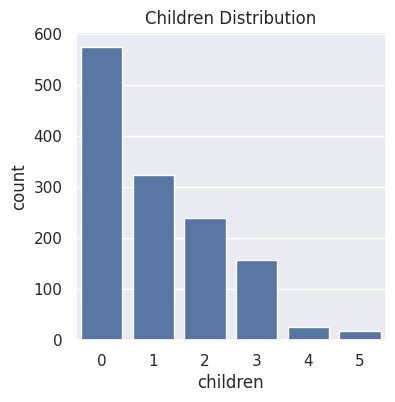

In [63]:
plt.figure(figsize=(4,4))
plt.title("Children Distribution")
sns.countplot(x = 'children', data = insurance_dataset)
plt.show()

In [64]:
insurance_dataset['children'].value_counts()

,count
children,
0,574
1,324
2,240
3,157
4,25
5,18


In [65]:
insurance_dataset['smoker'].value_counts()

,count
smoker,
no,1064
yes,274


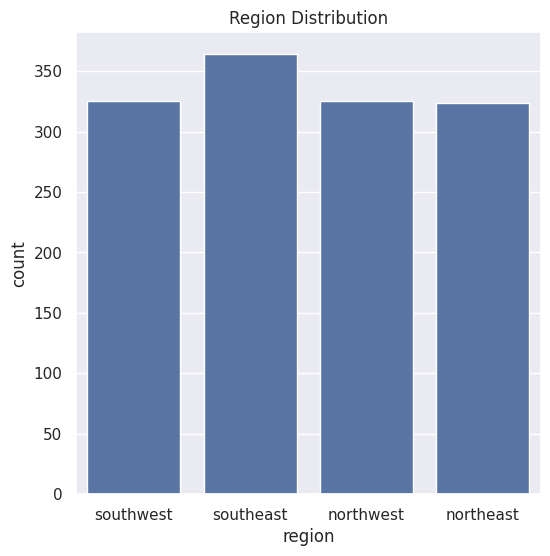

In [66]:
plt.figure(figsize=(6,6))
plt.title("Region Distribution")
sns.countplot(x = 'region', data = insurance_dataset)
plt.show()

<ipython-input-67-acf57e756ec7>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(insurance_dataset['charges'])


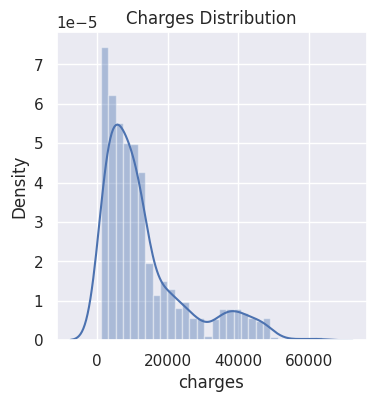

In [67]:
plt.figure(figsize=(4,4))
plt.title("Charges Distribution")
sns.distplot(insurance_dataset['charges'])
plt.show()

In [68]:
#Encoding the categorical features

insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
insurance_dataset.replace({'region':{'southeast':0,'southwest':1,'northeast':2,'northwest':3}}, inplace=True)

<ipython-input-68-1afce21a79ec>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'sex':{'male':0,'female':1}}, inplace=True)
<ipython-input-68-1afce21a79ec>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  insurance_dataset.replace({'smoker':{'yes':0,'no':1}}, inplace=True)
<ipython-input-68-1afce21a79ec>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to th

In [69]:
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


In [70]:
from re import X
#Splitting into feautures and target

X= insurance_dataset.drop(columns='charges', axis=1)
Y= insurance_dataset['charges']

In [71]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    1  27.900         0       0       1
1      18    0  33.770         1       1       0
2      28    0  33.000         3       1       0
3      33    0  22.705         0       1       3
4      32    0  28.880         0       1       3
...   ...  ...     ...       ...     ...     ...
1333   50    0  30.970         3       1       3
1334   18    1  31.920         0       1       2
1335   18    1  36.850         0       1       0
1336   21    1  25.800         0       1       1
1337   61    1  29.070         0       0       3

[1338 rows x 6 columns]


In [72]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64


In [73]:
#Splitting into training and test data

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=7)

In [74]:
print(X.shape, X_train.shape, X_test.shape)

(1338, 6) (1204, 6) (134, 6)


In [75]:
#Model Training

model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [76]:
#Model Evaluation

training_data_prediction = model.predict(X_train)

In [77]:
#R squared value

r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared value in training data: ', r2_train)

R squared value in training data:  0.7512136568448742


In [78]:
test_data_prediction = model.predict(X_test)
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared value in test data: ', r2_test)

R squared value in test data:  0.7426692273992045


In [50]:
#Predictor System

input_data = (18,0,33.77,1,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction = model.predict(input_data_reshaped)
print('The insurance cost in USD is', prediction[0])

The insurance cost in USD is 3372.5692122480577


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [79]:
#Using Random Forest Regressor

regressor = RandomForestRegressor(n_estimators=100)
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [80]:
train_data_prediction = regressor.predict(X_train)

In [81]:
r2_train_reg = metrics.r2_score(Y_train, train_data_prediction)
print('R squared value in training data: ', r2_train_reg)

R squared value in training data:  0.9764771899840768


In [85]:
input_data = (18,0,33.77,1,1,0)
input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
prediction_reg = regressor.predict(input_data_reshaped)
print('The insurance cost in USD is', prediction_reg[0])

The insurance cost in USD is 1966.3788765000004


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
